In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from tqdm.notebook import tqdm

In [2]:
query = "SELECT * FROM hop"

with sqlite3.connect('NPPES_Data_Dissemination.sqlite') as db: 
    hop_sqlite = pd.read_sql(query, db)
    
hop_sqlite

,from_npi,to_npi,patient_count,transaction_count,average_day_wait,std_day_wait
0,1508085911,1730166125,58,67,23.925,43.923
1,1508167040,1730166125,51,51,28.196,52.876
2,1508863549,1730166125,340,391,18.302,42.422
3,1508867870,1730166125,50,79,12.658,26.402
4,1508011040,1730166224,132,145,8.579,28.053
...,...,...,...,...,...,...
34176933,1417037664,1497939599,36,106,19.330,42.407
34176934,1417194903,1497939599,22,70,16.629,30.598
34176935,1417406372,1497939599,21,65,20.123,37.750
34176936,1417064825,1497940605,75,79,10.418,34.744


In [3]:
facility_query = "SELECT NPI, [ProviderOrganizationName(LegalBusinessName)], ProviderBusinessPracticeLocationAddressPostalCode, HealthcareProviderTaxonomyCode FROM [nppes] WHERE EntityTypeCode = 2 AND ProviderBusinessPracticeLocationAddressCityName = 'NASHVILLE' AND ProviderBusinessPracticeLocationAddressStateName = 'TN' AND HealthcareProviderPrimaryTaxonomySwitch = 'Y' GROUP BY NPI, 'ProviderOrganizationName(LegalBusinessName)', ProviderBusinessPracticeLocationAddressPostalCode, HealthcareProviderTaxonomyCode"
    
facility_sqlite = pd.read_sql(facility_query, db)
    
facility_sqlite

,NPI,ProviderOrganizationName(LegalBusinessName),ProviderBusinessPracticeLocationAddressPostalCode,HealthcareProviderTaxonomyCode
0,1003046509,JARMON D & Q TRANSORT,372071308,343900000X
1,1003085754,DOHNAL CHIROPRACTIC INC.,372116810,111N00000X
2,1003107673,"MEHARRY MEDICAL COLLEGE, SCHOOL OF DENTISTRY",37208,261QD0000X
3,1003118126,"KEISER CHIROPRACTIC NEUROLOGY CENTER, PC",372143530,111NN0400X
4,1003152208,"TRISTAR GYNECOLOGY ONCOLOGY, LLC",372031534,207VX0201X
...,...,...,...,...
2979,1992972087,INTERNAL MEDICINE ASSOCIATES OF SOUTHERN HILLS...,372114880,207R00000X
2980,1992972772,TAXI USA OF TENNESSEE LLC,37210,344600000X
2981,1992978746,"HAL SCHOFIELD MD, PC",372122804,2084P0800X
2982,1992987101,"RENAISSANCE WOMEN'S CENTER, PC",372281511,261QM2500X


In [4]:
provider_query = "SELECT NPI, ProviderFirstName, [ProviderLastName(LegalName)], ProviderNamePrefixText, ProviderNameSuffixText, ProviderCredentialText, HealthcareProviderTaxonomyCode FROM [NPPES] WHERE EntityTypeCode = 1 AND ProviderBusinessPracticeLocationAddressCityName = 'NASHVILLE' AND ProviderBusinessPracticeLocationAddressStateName = 'TN' AND HealthcareProviderPrimaryTaxonomySwitch = 'Y' AND HealthcareProviderTaxonomyCode NOT NULL GROUP BY NPI, NPI, ProviderFirstName, [ProviderLastName(LegalName)], ProviderNamePrefixText, ProviderNameSuffixText, ProviderCredentialText, HealthcareProviderTaxonomyCode"

provider = pd.read_sql(provider_query, db)

provider

,NPI,ProviderFirstName,ProviderLastName(LegalName),ProviderNamePrefixText,ProviderNameSuffixText,ProviderCredentialText,HealthcareProviderTaxonomyCode
0,1003000282,ROSIE,BLAKEMORE,None,None,FNP,363LF0000X
1,1003007923,CLYDE,RAMEY,None,None,None,171M00000X
2,1003009549,RAMUNE,SILEIKYTE,None,None,None,390200000X
3,1003010588,ENGLISH,FLACK,None,None,MD,2080P0202X
4,1003013947,ROBERT,OTTO,DR.,None,M.D.,207X00000X
...,...,...,...,...,...,...,...
19502,1992987085,SUSANNE,HORTON,None,None,CRNA,367500000X
19503,1992987572,KIMBERLY,ANDERSON,None,None,None,2255A2300X
19504,1992987671,MARIAN,MORGAN,None,None,RN,363LF0000X
19505,1992992697,KARA,COLE,None,None,PA,363AS0400X


In [5]:
taxonomy_nucc = pd.read_csv('nucc_taxonomy_230.csv', encoding= 'unicode_escape')

In [6]:
provider = provider.merge(taxonomy_nucc, left_on = "HealthcareProviderTaxonomyCode", right_on = "Code")
provider

,NPI,ProviderFirstName,ProviderLastName(LegalName),ProviderNamePrefixText,ProviderNameSuffixText,ProviderCredentialText,HealthcareProviderTaxonomyCode,Code,Grouping,Classification,Specialization,Definition,Notes,Display Name,Section
0,1003000282,ROSIE,BLAKEMORE,None,None,FNP,363LF0000X,363LF0000X,Physician Assistants & Advanced Practice Nursi...,Nurse Practitioner,Family,Definition to come...,NaN,Family Nurse Practitioner,Individual
1,1003111071,GOLD,NWOKOCHAH,None,None,None,363LF0000X,363LF0000X,Physician Assistants & Advanced Practice Nursi...,Nurse Practitioner,Family,Definition to come...,NaN,Family Nurse Practitioner,Individual
2,1003215997,PRINCESS,SHELTON,None,None,FNP-BC,363LF0000X,363LF0000X,Physician Assistants & Advanced Practice Nursi...,Nurse Practitioner,Family,Definition to come...,NaN,Family Nurse Practitioner,Individual
3,1003232927,EMILY,HIATT,MRS.,None,FNP-BC,363LF0000X,363LF0000X,Physician Assistants & Advanced Practice Nursi...,Nurse Practitioner,Family,Definition to come...,NaN,Family Nurse Practitioner,Individual
4,1003245689,JOCELYN,DECKER,None,None,FNP,363LF0000X,363LF0000X,Physician Assistants & Advanced Practice Nursi...,Nurse Practitioner,Family,Definition to come...,NaN,Family Nurse Practitioner,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19502,1972778090,ROBERT,HUNLEY,None,JR.,COTA/L,225XR0403X,225XR0403X,"Respiratory, Developmental, Rehabilitative and...",Occupational Therapist,Driving and Community Mobility,Occupational therapists can optimize and prolo...,Source: The Guide to Occupational Therapy Prac...,Driving and Community Mobility Occupational Th...,Individual
19503,1982651360,JENNIFER,ERICH,None,None,MD,207PH0002X,207PH0002X,Allopathic & Osteopathic Physicians,Emergency Medicine,Hospice and Palliative Medicine,An emergency medicine physician with special k...,Source: American Academy of Hospice and Pallia...,Hospice and Palliative Medicine (Emergency Med...,Individual
19504,1982909370,JESSICA,EASLEY,None,None,None,171WH0202X,171WH0202X,Other Service Providers,Contractor,Home Modifications,Definition to come...,NaN,Home Modifications Contractor,Individual
19505,1992223804,TINA,RAY,None,None,None,364SG0600X,364SG0600X,Physician Assistants & Advanced Practice Nursi...,Clinical Nurse Specialist,Gerontology,Definition to come...,NaN,Gerontology Clinical Nurse Specialist,Individual


In [8]:
provider['Classification'].unique()

array(['Nurse Practitioner', 'Case Manager/Care Coordinator',
       'Student in an Organized Health Care Education/Training Program',
       'Pediatrics', 'Orthopaedic Surgery', 'Pharmacist',
       'Psychiatry & Neurology', 'Internal Medicine',
       'Nurse Anesthetist, Certified Registered', 'Audiologist',
       'Family Medicine', 'Counselor', 'Registered Nurse',
       'Physical Therapist', 'Psychologist', 'Social Worker',
       'Thoracic Surgery (Cardiothoracic Vascular Surgery)',
       'Behavior Analyst', 'Speech-Language Pathologist',
       'Genetic Counselor, MS', 'Surgery', 'Anesthesiology', 'Technician',
       'Dentist', 'Occupational Therapist', 'Preventive Medicine',
       'Optometrist', 'Specialist/Technologist', 'Pathology',
       'General Acute Care Hospital', 'Emergency Medicine', 'Hospitalist',
       'Urology', 'Physician Assistant', 'Massage Therapist',
       'Marriage & Family Therapist', 'Case Management',
       'Dietitian, Registered', 'Behavior Technici

In [7]:
facility = facility_sqlite.merge(taxonomy_nucc, left_on = "HealthcareProviderTaxonomyCode", right_on = "Code")
facility = facility[facility['Grouping'] == 'Hospitals']
facility

,NPI,ProviderOrganizationName(LegalBusinessName),ProviderBusinessPracticeLocationAddressPostalCode,HealthcareProviderTaxonomyCode,Code,Grouping,Classification,Specialization,Definition,Notes,Display Name,Section
185,1003211145,MONROE CARELL JR. CHILDREN'S HOSPITAL AT VANDE...,372320005,282NC2000X,282NC2000X,Hospitals,General Acute Care Hospital,Children,Definition to come...,NaN,Children's Hospital,Non-Individual
186,1164609319,VANDERBILT MEDICAL CENTER,372320034,282NC2000X,282NC2000X,Hospitals,General Acute Care Hospital,Children,Definition to come...,NaN,Children's Hospital,Non-Individual
187,1255577466,MONROE CARELL JR VANDERBILT CHILDREN'S HOSPITAL,372320005,282NC2000X,282NC2000X,Hospitals,General Acute Care Hospital,Children,Definition to come...,NaN,Children's Hospital,Non-Individual
188,1326224015,VANDERBILT CHILDRENS HOSPITAL,372320005,282NC2000X,282NC2000X,Hospitals,General Acute Care Hospital,Children,Definition to come...,NaN,Children's Hospital,Non-Individual
189,1609056399,VANDERBILT CHILDREN'S,372320001,282NC2000X,282NC2000X,Hospitals,General Acute Care Hospital,Children,Definition to come...,NaN,Children's Hospital,Non-Individual
...,...,...,...,...,...,...,...,...,...,...,...,...
2881,1700950284,VANDERBILT UNIVERSITY MEDICAL CENTER,372320014,282NC0060X,282NC0060X,Hospitals,General Acute Care Hospital,Critical Access,Definition to come.,[7/1/2003: new],Critical Access Hospital,Non-Individual
2913,1568477990,DEPARTMENT OF VETERANS AFFAIRS NASHVILLE,372122637,286500000X,286500000X,Hospitals,Military Hospital,NaN,A health care facility operated by the Departm...,NaN,Military Hospital,Non-Individual
2935,1699436626,"SAINT THOMAS REHABILITATION HOSPITAL, LLC",372031846,283X00000X,283X00000X,Hospitals,Rehabilitation Hospital,NaN,A hospital or facility that provides health-re...,Source: Joint Commission on Accreditation of H...,Rehabilitation Hospital,Non-Individual
2936,1972749406,VANDERBILT ORTHOPAEDIC INSTITUTE,372320001,283X00000X,283X00000X,Hospitals,Rehabilitation Hospital,NaN,A hospital or facility that provides health-re...,Source: Joint Commission on Accreditation of H...,Rehabilitation Hospital,Non-Individual


In [10]:
provider.to_sql('provider', db, if_exists = 'replace', index = False)

19507

In [11]:
facility.to_sql('facility', db, if_exists = 'replace', index = False)

74

In [12]:
test_query = "SELECT Classification FROM provider"
provider_test = pd.read_sql(test_query, db)

provider_test

,Classification
0,Nurse Practitioner
1,Nurse Practitioner
2,Nurse Practitioner
3,Nurse Practitioner
4,Nurse Practitioner
...,...
19502,Occupational Therapist
19503,Emergency Medicine
19504,Contractor
19505,Clinical Nurse Specialist


In [8]:
specialist_query = "SELECT hop.from_npi, hop.to_npi, hop.patient_count, hop.transaction_count, ProviderFirstName AS First_Name, [ProviderLastName(LegalName)] AS Last_Name, [ProviderOrganizationName(LegalBusinessName)] AS Hospital_Name, provider.Classification FROM provider INNER JOIN hop ON provider.NPI = hop.from_npi LEFT JOIN facility ON hop.to_npi = facility.NPI ORDER BY hop.patient_count DESC;"




specialist_test = pd.read_sql(specialist_query, db)

specialist_test

,from_npi,to_npi,patient_count,transaction_count,First_Name,Last_Name,Hospital_Name,Classification
0,1093753303,1003863580,127792,234741,DEREK,WELCH,None,Pathology
1,1093753303,1124075635,124782,227691,DEREK,WELCH,None,Pathology
2,1093753303,1235186800,111956,203632,DEREK,WELCH,None,Pathology
3,1093753303,1376548271,10982,13287,DEREK,WELCH,None,Pathology
4,1093753303,1861478489,10368,12780,DEREK,WELCH,None,Pathology
...,...,...,...,...,...,...,...,...
63906,1184711293,1104202761,11,132,HELEN,HATFIELD,None,Nurse Practitioner
63907,1346765476,1124443403,11,88,HEATHER,CONLEY,None,Nurse Practitioner
63908,1023253549,1245274778,11,50,RHETT,BRUNER,None,Chiropractor
63909,1215250295,1578596961,11,115,SUNDAY,OGUNDE,None,Internal Medicine


In [5]:
specialist_test['Hospital_Name'].unique()

array([None, 'HCA HEALTH SERVICES OF TENNESSEE, INC.',
       'VANDERBILT UNIVERSITY MEDICAL CENTER',
       'HTI MEMORIAL HOSPITAL CORPORATION', 'SAINT THOMAS WEST HOSPITAL',
       'NASHVILLE GENERAL HOSPITAL', "BAPTIST WOMEN'S HEALTH CENTER LLC",
       'SELECT SPECIALTY HOSPITAL - NASHVILLE LLC', 'SETON CORPORATION',
       'CURAHEALTH NASHVILLE, LLC',
       'STATE OF TENNESSEE STATE F&A PAYROLL'], dtype=object)

In [10]:
specialist_test['Classification'].unique()

array(['Pathology', 'Dermatology', 'Internal Medicine', 'Radiology',
       'Ophthalmology', 'Specialist', 'Nuclear Medicine', 'Surgery',
       'Urology', 'Physician Assistant', 'Anesthesiology',
       'Emergency Medicine', 'Nurse Practitioner', 'Pain Medicine',
       'Clinic/Center', 'Physical Medicine & Rehabilitation',
       'Orthopaedic Surgery', 'Hospitalist', 'Podiatrist',
       'Psychiatry & Neurology', 'Family Medicine',
       'Obstetrics & Gynecology', 'Preventive Medicine', 'Optometrist',
       'Neurological Surgery', 'Nurse Anesthetist, Certified Registered',
       'Otolaryngology',
       'Student in an Organized Health Care Education/Training Program',
       'Physical Therapist', 'Allergy & Immunology', 'Pediatrics',
       'Thoracic Surgery (Cardiothoracic Vascular Surgery)',
       'Plastic Surgery', 'Audiologist', 'Colon & Rectal Surgery',
       'General Practice', 'Audiologist-Hearing Aid Fitter',
       'Transplant Surgery', 'Clinical Nurse Specialist',
    

In [9]:
Nash_NPI = specialist_test[specialist_test.Hospital_Name.isin(['HCA HEALTH SERVICES OF TENNESSEE, INC.',
       'VANDERBILT UNIVERSITY MEDICAL CENTER',
       'HTI MEMORIAL HOSPITAL CORPORATION', 'SAINT THOMAS WEST HOSPITAL',
       'NASHVILLE GENERAL HOSPITAL', "BAPTIST WOMEN'S HEALTH CENTER LLC",
       'SELECT SPECIALTY HOSPITAL - NASHVILLE LLC', 'SETON CORPORATION',
       'CURAHEALTH NASHVILLE, LLC',
       'STATE OF TENNESSEE STATE F&A PAYROLL'])]

Nash_NPI

,from_npi,to_npi,patient_count,transaction_count,First_Name,Last_Name,Hospital_Name,Classification
5,1093753303,1023055126,9196,16819,DEREK,WELCH,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Pathology
11,1417131715,1023055126,5571,9007,JOHN,RIDDICK,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Internal Medicine
24,1316983695,1396882205,3759,4343,ADAM,GUTTENTAG,VANDERBILT UNIVERSITY MEDICAL CENTER,Radiology
26,1740377845,1396882205,3728,4453,DAVID,TABER,VANDERBILT UNIVERSITY MEDICAL CENTER,Radiology
31,1043302466,1396882205,3436,4038,JOHN,BLOCK,VANDERBILT UNIVERSITY MEDICAL CENTER,Radiology
...,...,...,...,...,...,...,...,...
63805,1518054626,1568551455,17,50,SUSAN,KROOP,NASHVILLE GENERAL HOSPITAL,Internal Medicine
63825,1104808641,1396882205,16,57,HARRY,JOHNSON,VANDERBILT UNIVERSITY MEDICAL CENTER,Internal Medicine
63862,1558515437,1396882205,14,56,LINDA,MANNING,VANDERBILT UNIVERSITY MEDICAL CENTER,Psychologist
63888,1255605036,1568551455,12,55,LISA,BOLTON,NASHVILLE GENERAL HOSPITAL,Nurse Practitioner


In [14]:
Nash_NPI_Minus_Vandy = specialist_test[specialist_test.Hospital_Name.isin(['HCA HEALTH SERVICES OF TENNESSEE, INC.',
       'HTI MEMORIAL HOSPITAL CORPORATION', 'SAINT THOMAS WEST HOSPITAL',
       'NASHVILLE GENERAL HOSPITAL', "BAPTIST WOMEN'S HEALTH CENTER LLC",
       'SELECT SPECIALTY HOSPITAL - NASHVILLE LLC', 'SETON CORPORATION',
       'CURAHEALTH NASHVILLE, LLC',
       'STATE OF TENNESSEE STATE F&A PAYROLL'])]

Nash_NPI_Minus_Vandy

,from_npi,to_npi,patient_count,transaction_count,First_Name,Last_Name,Hospital_Name,Classification
5,1093753303,1023055126,9196,16819,DEREK,WELCH,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Pathology
11,1417131715,1023055126,5571,9007,JOHN,RIDDICK,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Internal Medicine
88,1093753303,1720032345,2610,5166,DEREK,WELCH,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Pathology
148,1053337717,1295780476,2048,3082,SUNIL,KAZA,HTI MEMORIAL HOSPITAL CORPORATION,Internal Medicine
159,1427079946,1295780476,1970,3071,CHRISTOPHER,CONLEY,HTI MEMORIAL HOSPITAL CORPORATION,Internal Medicine
...,...,...,...,...,...,...,...,...
63365,1447223094,1629025648,25,52,MI,YU,SAINT THOMAS WEST HOSPITAL,Psychiatry & Neurology
63563,1376618397,1023055126,22,56,DOUGLAS,OLSEN,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Surgery
63564,1427092444,1023055126,22,57,DAVID,DYER,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Surgery
63805,1518054626,1568551455,17,50,SUSAN,KROOP,NASHVILLE GENERAL HOSPITAL,Internal Medicine


In [24]:
Vandy_NPI = specialist_test[specialist_test.Hospital_Name.isin(['VANDERBILT UNIVERSITY MEDICAL CENTER'])]

Vandy_NPI

,from_npi,to_npi,patient_count,transaction_count,First_Name,Last_Name,Hospital_Name,Classification
24,1316983695,1396882205,3759,4343,ADAM,GUTTENTAG,VANDERBILT UNIVERSITY MEDICAL CENTER,Radiology
26,1740377845,1396882205,3728,4453,DAVID,TABER,VANDERBILT UNIVERSITY MEDICAL CENTER,Radiology
31,1043302466,1396882205,3436,4038,JOHN,BLOCK,VANDERBILT UNIVERSITY MEDICAL CENTER,Radiology
56,1215966726,1396882205,3004,3447,MARTIN,JORDANOV,VANDERBILT UNIVERSITY MEDICAL CENTER,Radiology
57,1215029632,1396882205,2998,3377,EDWIN,DONNELLY,VANDERBILT UNIVERSITY MEDICAL CENTER,Radiology
...,...,...,...,...,...,...,...,...
63783,1861571168,1396882205,17,50,REGINE,ANDERSON,VANDERBILT UNIVERSITY MEDICAL CENTER,Social Worker
63794,1801301999,1396882205,17,58,JENNIFER,BROWN,VANDERBILT UNIVERSITY MEDICAL CENTER,Nurse Practitioner
63825,1104808641,1396882205,16,57,HARRY,JOHNSON,VANDERBILT UNIVERSITY MEDICAL CENTER,Internal Medicine
63862,1558515437,1396882205,14,56,LINDA,MANNING,VANDERBILT UNIVERSITY MEDICAL CENTER,Psychologist


In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
g = sns.FacetGrid(Nash_NPI_Minus_Vandy, col="Last_Name")
g.map(sns.barplot(
    data = Nash_NPI_Minus_Vandy[Nash_NPI_Minus_Vandy.Classification.isin(['Family Medicine', 'Orthopaedic Surgery'])],
    x = 'Hospital_Name',
    y = 'patient_count',
    hue = 'Classification',
    ax = ax
))


In [1]:
Nash_Ortho_Fam = Nash_NPI[Nash_NPI.Classification.isin(['Orthopaedic Surgery', 'Family Medicine'])]

NameError: name 'Nash_NPI' is not defined

In [ ]:
sns.barplot(data=gdp_df.groupby(['Continent'])['Country'].nunique().to_frame().reset_index().rename(columns = {'Country' : 'Total_Countries'}), y='Continent', x='Total_Countries', hue='Continent', dodge=False); 

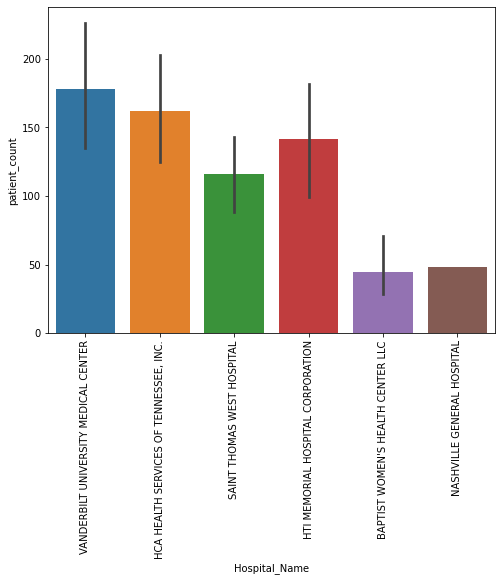

In [12]:
fig, ax = plt.subplots(figsize = (8,6))

sns.barplot(
    data = Nash_NPI[Nash_NPI.Classification.isin(['Orthopaedic Surgery'])],
    x = 'Hospital_Name',
    y = 'patient_count',
    ax = ax
)
plt.xticks(rotation = 90);

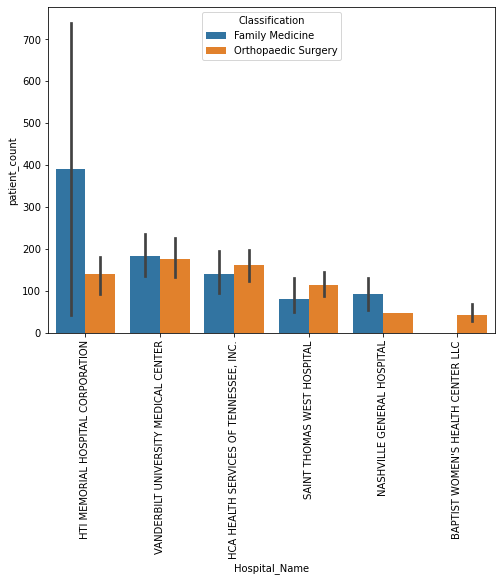

In [13]:
fig, ax = plt.subplots(figsize = (8,6))

sns.barplot(
    data = Nash_NPI[Nash_NPI.Classification.isin(['Family Medicine', 'Orthopaedic Surgery'])],
    x = 'Hospital_Name',
    y = 'patient_count',
    hue = 'Classification',
    ax = ax
)
plt.xticks(rotation = 90);

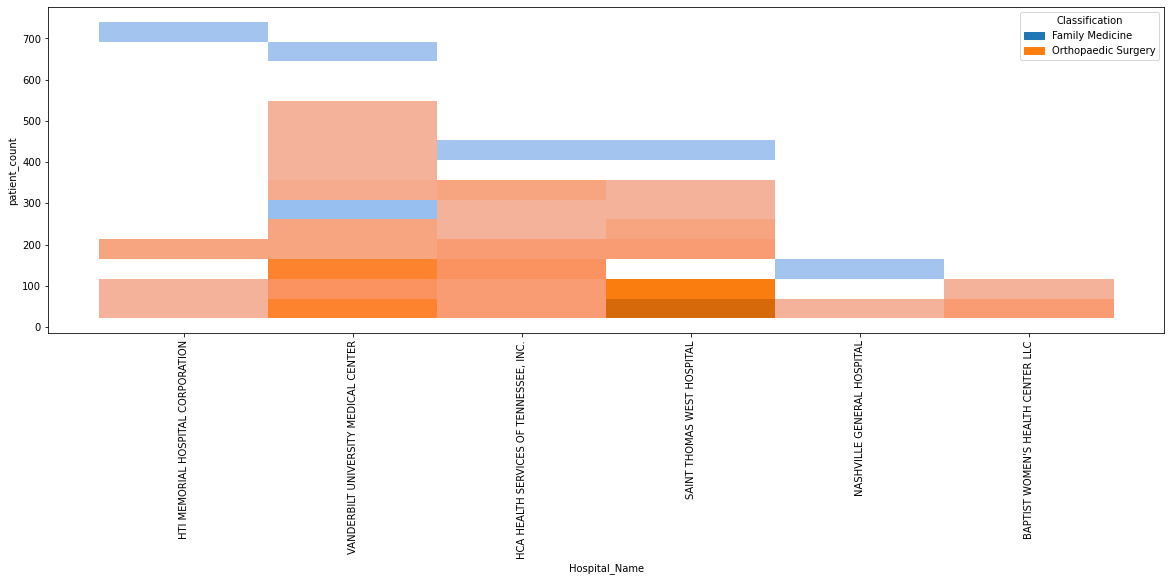

In [67]:
fig, ax = plt.subplots(figsize = (20,6))

sns.histplot(
    data = Nash_NPI[Nash_NPI.Classification.isin(['Family Medicine', 'Orthopaedic Surgery'])],
    x = 'Hospital_Name',
    y = 'patient_count',
    hue = 'Classification',
    ax = ax
)
plt.xticks(rotation = 90);

In [35]:
Nash_Fam_Med = Nash_NPI[Nash_NPI.Classification.isin(['Orthopaedic Surgery'])]

Nash_Fam_Med['patient_count'].median()

112.0

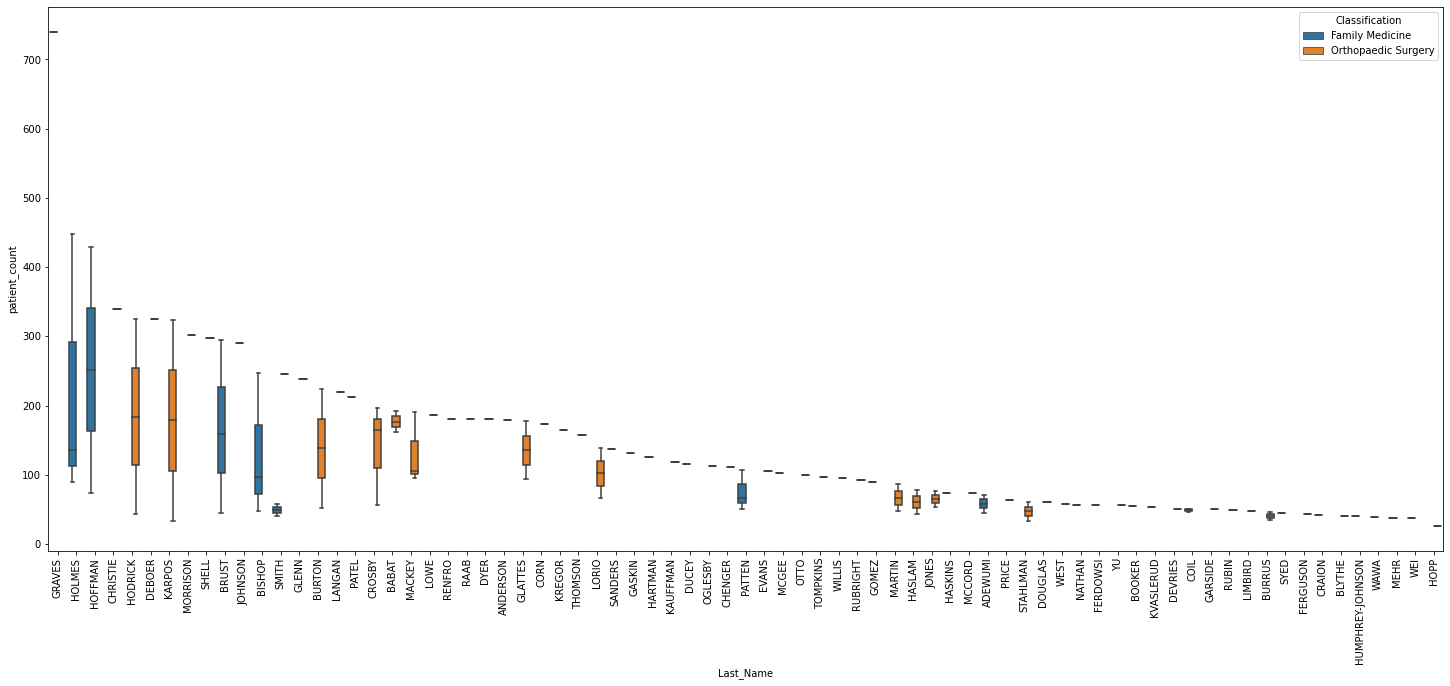

In [47]:
fig, ax = plt.subplots(figsize = (25,10))

sns.boxplot(
    data = Nash_NPI_Minus_Vandy[Nash_NPI_Minus_Vandy.Classification.isin(['Family Medicine', 'Orthopaedic Surgery'])],
    x = 'Last_Name',
    y = 'patient_count',
    hue = 'Classification',
    ax = ax
)
plt.xticks(rotation = 90);

In [64]:
Nash_NPI_Minus_Vandy[Nash_NPI_Minus_Vandy['Last_Name'] == 'DEBOER']

,from_npi,to_npi,patient_count,transaction_count,First_Name,Last_Name,Hospital_Name,Classification
4477,1942265400,1023055126,325,850,DAVID,DEBOER,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Orthopaedic Surgery


In [10]:
neo4j_output = pd.read_csv('neo4j_output.csv', encoding= 'unicode_escape')

In [11]:
neo4j_output.to_sql('neo4j_output', db, if_exists = 'replace', index = False)

18088

In [12]:
neo4j_output.head()

,number,communityId
0,1164785416,18083
1,1073922167,18083
2,1376949206,18071
3,1366465098,18071
4,1528051448,18067


In [39]:
neo4j_output.groupby(['communityId'])['number'].count().sort_values(ascending = False).head(10)

communityId
4442    2488
4384    1732
4377    1309
4413    1237
4454     811
113      717
4702     659
4886     509
315      352
969      336
Name: number, dtype: int64

<AxesSubplot:xlabel='communityId'>

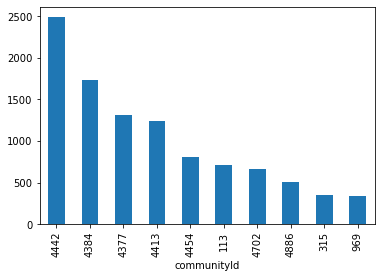

In [40]:
neo4j_output.groupby(['communityId'])['number'].count().sort_values(ascending = False).head(10).plot(kind = 'bar')


In [23]:
specialist_group_id = "SELECT hop.from_npi, hop.to_npi, hop.patient_count, hop.transaction_count, ProviderFirstName AS First_Name, [ProviderLastName(LegalName)] AS Last_Name, [ProviderOrganizationName(LegalBusinessName)] AS Hospital_Name, provider.Classification, neo4j_output.communityId FROM provider INNER JOIN hop ON provider.NPI = hop.from_npi LEFT JOIN facility ON hop.to_npi = facility.NPI LEFT JOIN neo4j_output ON hop.from_npi = neo4j_output.number ORDER BY hop.patient_count DESC;"




specialist_group_id = pd.read_sql(specialist_group_id, db)

specialist_group_id

,from_npi,to_npi,patient_count,transaction_count,First_Name,Last_Name,Hospital_Name,Classification,communityId
0,1093753303,1003863580,127792,234741,DEREK,WELCH,None,Pathology,4442
1,1093753303,1124075635,124782,227691,DEREK,WELCH,None,Pathology,4442
2,1093753303,1235186800,111956,203632,DEREK,WELCH,None,Pathology,4442
3,1093753303,1376548271,10982,13287,DEREK,WELCH,None,Pathology,4442
4,1093753303,1861478489,10368,12780,DEREK,WELCH,None,Pathology,4442
...,...,...,...,...,...,...,...,...,...
63906,1184711293,1104202761,11,132,HELEN,HATFIELD,None,Nurse Practitioner,4384
63907,1346765476,1124443403,11,88,HEATHER,CONLEY,None,Nurse Practitioner,4377
63908,1023253549,1245274778,11,50,RHETT,BRUNER,None,Chiropractor,4413
63909,1215250295,1578596961,11,115,SUNDAY,OGUNDE,None,Internal Medicine,4939


<AxesSubplot:xlabel='communityId,Classification'>

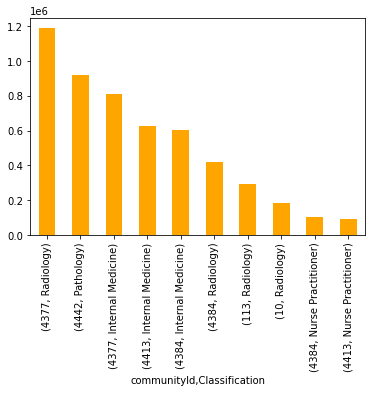

In [32]:
specialist_group_id.groupby(['communityId', 'Classification'])['patient_count'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'orange')

In [68]:
radiology_4384 = specialist_group_id.query('communityId == [4384] & Classification == "Internal Medicine"')

radiology_4384

,from_npi,to_npi,patient_count,transaction_count,First_Name,Last_Name,Hospital_Name,Classification,communityId
65,1467491670,1104202761,2932,3589,SEAN,HUGHES,None,Internal Medicine,4384
70,1639362171,1104202761,2881,3713,RAPHAEL,SEE,None,Internal Medicine,4384
94,1700933504,1104202761,2501,3059,KENNETH,MONAHAN,None,Internal Medicine,4384
98,1639362171,1396882205,2455,2803,RAPHAEL,SEE,VANDERBILT UNIVERSITY MEDICAL CENTER,Internal Medicine,4384
111,1467491670,1396882205,2352,2571,SEAN,HUGHES,VANDERBILT UNIVERSITY MEDICAL CENTER,Internal Medicine,4384
...,...,...,...,...,...,...,...,...,...
63868,1104808641,1528422086,14,59,HARRY,JOHNSON,None,Internal Medicine,4384
63869,1669554556,1619930153,14,80,RACHEL,FISSELL,None,Internal Medicine,4384
63872,1174517593,1255448015,14,51,MICHAEL,NEUSS,None,Internal Medicine,4384
63879,1104808641,1104202761,13,50,HARRY,JOHNSON,None,Internal Medicine,4384


In [66]:
radiology_4384.groupby(['from_npi'])['patient_count'].sum().sort_values(ascending = False)

from_npi
1467491670    18378
1700933504    18030
1639362171    16922
1679665095    16244
1649362062    15677
              ...  
1265589071       29
1447359880       29
1003903113       27
1548367576       21
1750677332       13
Name: patient_count, Length: 345, dtype: int64

In [54]:
specialist_group_id[specialist_group_id['from_npi'] == 1417131715].groupby(['from_npi'])['patient_count'].sum()

from_npi
1417131715    88951
Name: patient_count, dtype: int64

In [70]:
specialist_group_id.query('communityId == [4413]').groupby(['from_npi'])['patient_count'].sum().sort_values(ascending = False)

from_npi
1770519704    21187
1326086653    19181
1285627398    18035
1861430621    14870
1942429816    14655
              ...  
1609931799       26
1356488498       25
1891786364       22
1801283346       19
1225188584       19
Name: patient_count, Length: 782, dtype: int64

In [72]:
specialist_group_id.query('communityId == [4413] & from_npi == [1770519704]')[['Last_Name', 'First_Name']]

,Last_Name,First_Name
59,GIBSON,DAVID
300,GIBSON,DAVID
385,GIBSON,DAVID
477,GIBSON,DAVID
630,GIBSON,DAVID
...,...,...
57995,GIBSON,DAVID
59487,GIBSON,DAVID
59873,GIBSON,DAVID
59874,GIBSON,DAVID


In [76]:
#4454

specialist_group_id.query('communityId == [4454]').groupby(['from_npi'])['patient_count'].sum().sort_values(ascending = False)

from_npi
1922091180    25593
1043206329    20067
1063404085    15968
1235545773    15365
1467406314    11407
              ...  
1053847970       20
1861693780       16
1245684067       15
1235598160       14
1255605036       12
Name: patient_count, Length: 224, dtype: int64

In [81]:
specialist_group_id.query('communityId == [4454] & from_npi == [1922091180]')

,from_npi,to_npi,patient_count,transaction_count,First_Name,Last_Name,Hospital_Name,Classification,communityId
82,1922091180,1417238577,2664,5371,BARRY,ALLEN,None,Radiology,4454
139,1922091180,1841388519,2085,4514,BARRY,ALLEN,None,Radiology,4454
493,1922091180,1427005008,1132,1892,BARRY,ALLEN,None,Radiology,4454
879,1922091180,1932166386,807,1133,BARRY,ALLEN,None,Radiology,4454
884,1922091180,1063451466,804,1332,BARRY,ALLEN,None,Radiology,4454
...,...,...,...,...,...,...,...,...,...
60959,1922091180,1104854124,38,52,BARRY,ALLEN,None,Radiology,4454
60960,1922091180,1770880049,38,56,BARRY,ALLEN,None,Radiology,4454
62257,1922091180,1194835645,33,57,BARRY,ALLEN,None,Radiology,4454
62932,1922091180,1811009632,29,53,BARRY,ALLEN,None,Radiology,4454


In [83]:
#113
specialist_group_id.query('communityId == [113]').groupby(['from_npi'])['patient_count'].sum().sort_values(ascending = False)

from_npi
1093903544    41713
1902801384    33795
1366686875    30380
1235164468    26422
1114152410    23433
1891748653    19055
1831315266    17670
1225358096    17407
1013960905    15212
1417982752    14591
1326024266    14394
1265463038    14217
1295912889    13813
1114952330    13283
1023014263     4242
1700124690     2848
1396015350     1254
1114121605      941
1821258393      794
1730557646      747
1780037531      696
1215440516      694
1255877999      630
1205097227      586
1982986279      506
1184663775      484
1447391677      453
1053760595      442
1861881468      394
1285992412      366
1497908701      343
1194721126      315
1902199375      293
1134149388      230
1144584376      180
1669764742      120
Name: patient_count, dtype: int64

In [84]:
specialist_group_id.query('communityId == [113] & from_npi == [1093903544]')

,from_npi,to_npi,patient_count,transaction_count,First_Name,Last_Name,Hospital_Name,Classification,communityId
55,1093903544,1043632433,3019,3818,ROXSANN,ROBERTS,None,Radiology,113
100,1093903544,1639264575,2434,3153,ROXSANN,ROBERTS,None,Radiology,113
128,1093903544,1154751931,2155,2713,ROXSANN,ROBERTS,None,Radiology,113
498,1093903544,1598764706,1128,1258,ROXSANN,ROBERTS,None,Radiology,113
612,1093903544,1396282463,999,1073,ROXSANN,ROBERTS,None,Radiology,113
...,...,...,...,...,...,...,...,...,...
55161,1093903544,1154364388,49,52,ROXSANN,ROBERTS,None,Radiology,113
55162,1093903544,1609119270,49,50,ROXSANN,ROBERTS,None,Radiology,113
56036,1093903544,1073516621,48,50,ROXSANN,ROBERTS,None,Radiology,113
58617,1093903544,1285796573,44,58,ROXSANN,ROBERTS,None,Radiology,113


In [86]:
#4702

specialist_group_id.query('communityId == [4702]').groupby(['from_npi'])['patient_count'].sum().sort_values(ascending = False)

from_npi
1306849765    41711
1235286196    12586
1063738599     9097
1992950166     5108
1942466552     4706
1518288547     3471
1710154331     3460
1316147762     3117
1508098740     2804
1164435004     1759
1346406956     1179
1154610475     1170
1770797193     1062
1265980551     1056
1932465457      738
1932375565      668
1316234974      562
1477928208      530
1417128141      461
1366790115      454
1467903617      416
1932518677      416
1063596187      403
1962797258      392
1992068951      289
1811439300      244
1871819383      208
1861507402      136
1811063647      124
1386178226       96
1447589734       92
Name: patient_count, dtype: int64

In [87]:
specialist_group_id.query('communityId == [4702] & from_npi == [1306849765]')

,from_npi,to_npi,patient_count,transaction_count,First_Name,Last_Name,Hospital_Name,Classification,communityId
140,1306849765,1700285335,2077,2419,PRADEEP,JACOB,None,Radiology,4702
182,1306849765,1700824455,1851,2132,PRADEEP,JACOB,None,Radiology,4702
242,1306849765,1548375082,1623,1867,PRADEEP,JACOB,None,Radiology,4702
1363,1306849765,1336107838,632,688,PRADEEP,JACOB,None,Radiology,4702
1572,1306849765,1376537357,584,630,PRADEEP,JACOB,None,Radiology,4702
...,...,...,...,...,...,...,...,...,...
57488,1306849765,1194130302,46,50,PRADEEP,JACOB,None,Radiology,4702
57489,1306849765,1841279981,46,51,PRADEEP,JACOB,None,Radiology,4702
59095,1306849765,1649266503,43,55,PRADEEP,JACOB,None,Radiology,4702
60277,1306849765,1134364318,40,52,PRADEEP,JACOB,None,Radiology,4702


In [31]:
#I'm seeing that there are a lot of missing values, primarily because our decisions building the 'specialist_list' table that limits what we can determine from the exploration. I'm going to attempt to read in additional items to better fill out the 'Community ID' picture.

Community_ID = """

SELECT 




specialist_group_id = pd.read_sql(specialist_group_id, db)

specialist_group_id
